# Titanic Classification

In [1]:
#Importing All Required Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
pd.set_option('display.max_columns',10,'display.width',1000)
train = pd.read_csv("C:/Users/DELL-PC/Downloads/Titanic-Dataset.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [3]:
#Display shape
train.shape

(891, 12)

In [4]:
#Checking for Null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Description of dataset
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [7]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
male_ind = len(train[train['Sex'] == 'male'])
print("No of Males in Titanic:",male_ind)

No of Males in Titanic: 577


In [9]:
female_ind = len(train[train['Sex'] == 'female'])
print("No of Females in Titanic:",female_ind)

No of Females in Titanic: 314


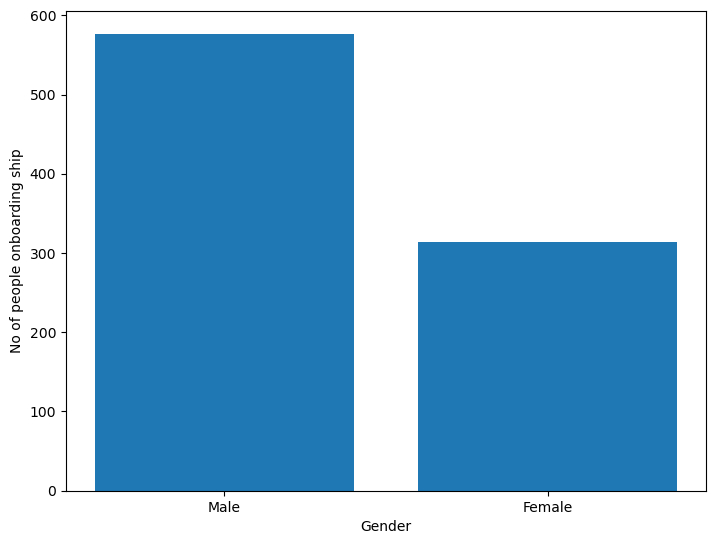

In [10]:
#Plotting the bar graph
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

In [11]:
alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])

In [12]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


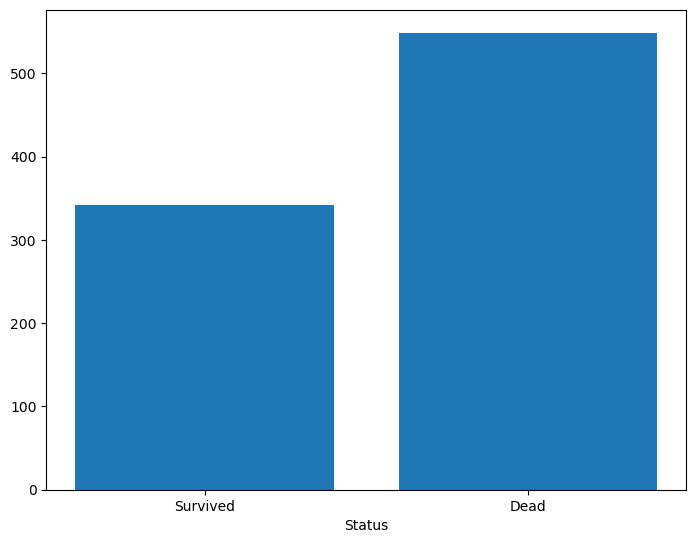

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
ind = [alive,dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

Text(0.5, 1.0, 'Bar graph of people accrding to ticket class')

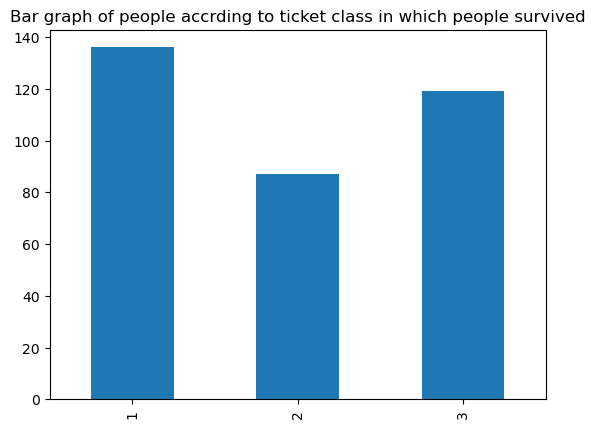

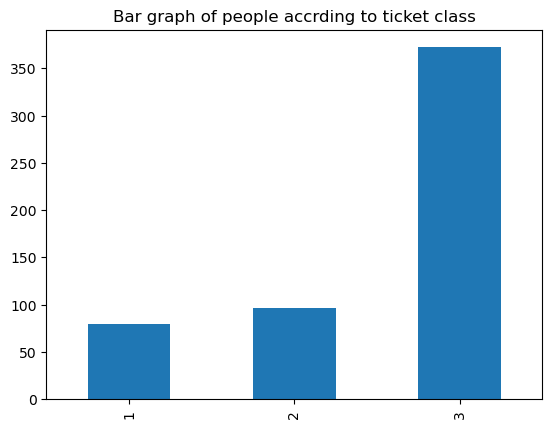

In [15]:
plt.figure(1)
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class in which people survived')


plt.figure(2)
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class')

([<matplotlib.axis.XTick at 0x1b89669ec10>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

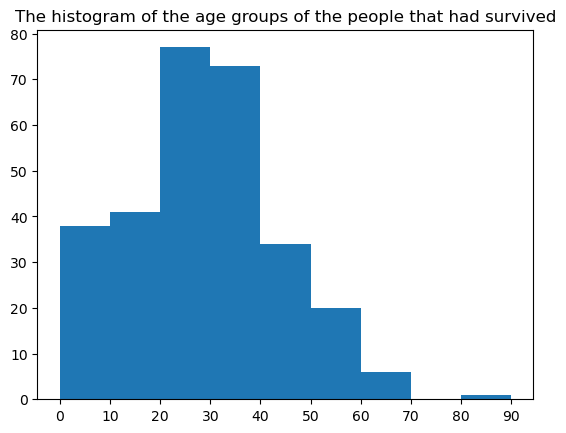

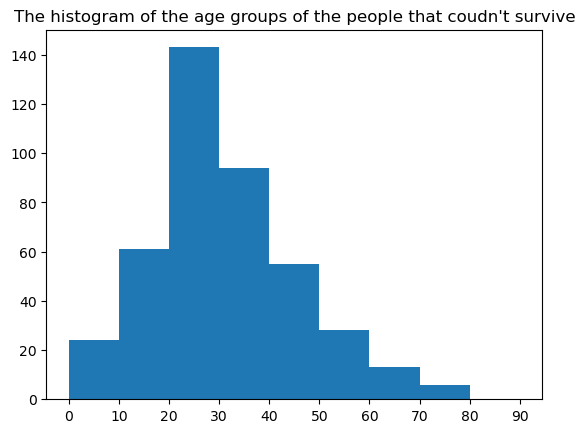

In [16]:
plt.figure(1)
age  = train.loc[train.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


plt.figure(2)
age  = train.loc[train.Survived == 0, 'Age']
plt.title('The histogram of the age groups of the people that coudn\'t survive')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [17]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [20]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [22]:
train[["Age", "Survived"]].groupby(['Age'], as_index=True).mean().sort_values(by='Age', ascending=True)

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


In [23]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


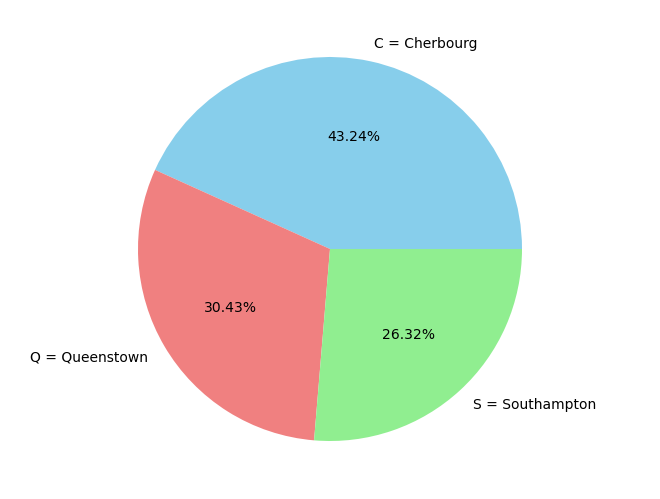

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571, 0.389610, 0.336957]
colors = ['skyblue', 'lightcoral', 'lightgreen']  # Specify the colors you want here

ax.pie(s, labels=l, autopct='%1.2f%%', colors=colors)
plt.show()


In [26]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [27]:
#Feature Selection
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
#training values
X=train[column_train]
#target value
Y=train['Survived']

In [28]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [29]:
#now we have to fill all the missing values
#age have 177  missing values
#either we fill missing values with mean or median form existing values 
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [30]:
X['Embarked'] = train['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

0

In [31]:
#now we need to convert sex into integer value 
d={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [32]:
e={'C':0, 'Q':1 ,'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [33]:
#Training Testing and Spliting the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [34]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7574626865671642


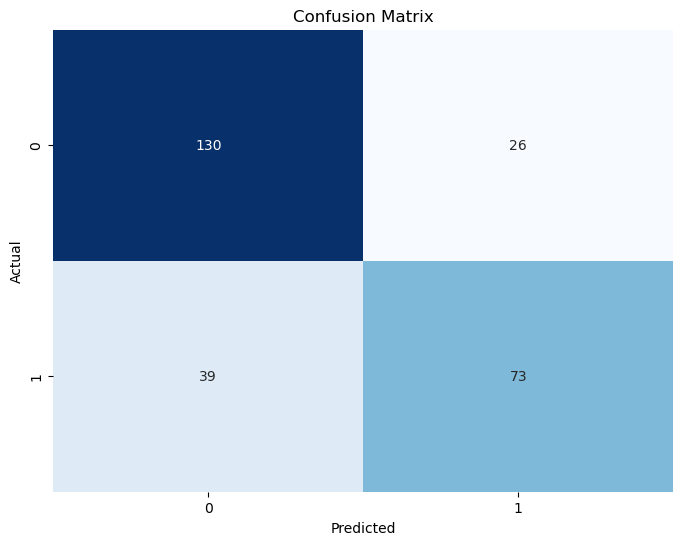

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you already have your confusion matrix
confusion_mat = confusion_matrix(Y_test, Y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [36]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,Y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.6604477611940298


In [37]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.6604477611940298
